In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [25]:
train_df= pd.read_csv('./data/trans_df_train.csv')
dev_df= pd.read_csv('./data/trans_df_dev.csv')
df= pd.read_csv('./data/trans_df_total.csv')

inference_df= pd.read_csv('./data/inference_sample.csv')

print(df.head())
print(inference_df.head())

                                question  answer  \
0               이란과 아프가니스탄이 같은 언어를 말하는가?    True   
1  좋은 사마리아인 법을 사고로 도와주는 사람들을 보호할 수 있을까요?    True   
2                      유리창 제조업체 중 하나인가요?    True   
3                 설탕은 분말 설탕과 똑같은 것이 있나요?    True   
4           온라인에서 오래된 스카이림과 같은 스크롤이 있나요?   False   

                                             passage  
0  익명의 파르시(Farsi)로도 알려진 페르시아어(Fersi Forsisi)는 인도-...  
1  좋은 사마리아인 법은 합리적인 도움을 주거나 자신이 믿는 사람, 부상, 병이 있거나...  
2  윈도우 영화관(옛날 윈도우라이브 영화 '윈도우' 7호)은 마이크로소프트가 중단한 영...  
3  과자의 설탕이라고도 불리는 밀가루 설탕, 설탕 얼리기, 아이스케이크 등은 분말 상태...  
4  노인 스크롤 시리즈에서 다른 게임들과 마찬가지로 타미리엘의 대륙에서 경기가 펼쳐진다...  
   Unnamed: 0 category context_name            question answer  \
0           0       과일            감         이것은 씨가 있나요?    NaN   
1           1       과일            감         이것의 씨는 큰가요?    NaN   
2           2       과일            감      이것은 나무에서 자라나요?   True   
3           3       과일            감  이것을 부르는 다른 말이 있나요?   True   
4           4       과일     

In [30]:
# train, dev data answer 분포
print(train_df.groupby(train_df['answer']).count())
print(dev_df.groupby(dev_df['answer']).count())
print(df.groupby(df['answer']).count())


        question  passage
answer                   
False       3553     3553
True        5874     5874
        question  passage
answer                   
False       1237     1237
True        2033     2033
        question  passage   len
answer                         
False       4790     4790  4790
True        7907     7907  7907


In [27]:
# passage들의 길이 분석 -> 상대적으로 차이가 많이 나는 것을 볼 수 있음..!
df['len']= df['passage'].apply(lambda x: len(x))
print(f"df passage mean length : {df['len'].mean()}")
print(f"df passage max length : {df['len'].max()}")
print(f"df passage min length : {df['len'].min()}")
print()

inference_df['len']= inference_df['passage'].apply(lambda x: len(x))
print(f"inference df passage mean length : {inference_df['len'].mean()}")
print(f"inference df passage max length : {inference_df['len'].max()}")
print(f"inference df passage min length : {inference_df['len'].min()}")


df passage mean length : 248.37323777270223
df passage max length : 2220
df passage min length : 19

inference df passage mean length : 4138.333333333333
inference df passage max length : 13550
inference df passage min length : 781



### Discussion
기존 boolq dataset의 answer는 True, False 밖에 없음.

우리는 No answer에 대한 데이터도 생성을 해줘야 함! 

inference data와 비슷하게 구성을 하기 위해
passage가 긴 문장 위주로 no answer data를 생성하고자 함.

<BarContainer object of 500 artists>

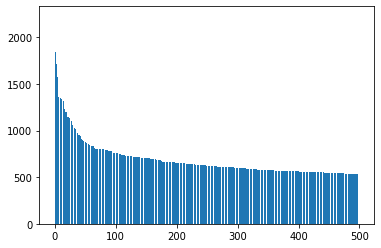

In [31]:
length= 500
df= df.sort_values(by= 'len',ascending=False)
plt.bar(np.arange(len(df))[:length], df['len'][:length])

### Discussion
no answer 데이터를 얼마나 생성해야하는지 고민을 하였음.

사용자 입장에서 no answer라는 답변보다 yes, no라는 답을 내어 주는 것이 더 낫다고 생각해서 true, false data보다 작은 30% 이하의 데이터를 생성하기로 결정함.

no answer data를 생성할 때 train, dev data에서 따로 뽑아 생성하였음.

train에서 2500, dev에서 1000개의 문장 생성

**생성하는데 사용한 방법**은 length 기준으로 sort한 다음에 한 passage에 대해 다른 passage의 question 5개를 mapping하여 no answer로 labeling하는 식으로 데이터를 생성하였음


In [37]:
train_df= pd.read_csv('./data/trans_df_train.csv')
train_df['len']= train_df['passage'].apply(lambda x: len(x))
train_df= train_df.sort_values(by= 'len',ascending=False)

no_ans_train_df= pd.DataFrame(columns= ['question', 'answer', 'passage'])

print(train_df.columns)
for i in tqdm(range(500)):
    for j in range(1, 6):
        new_data= {'question': train_df.iloc[i+j]['question'], 'passage': train_df.iloc[i]['passage'], 'answer': 'no answer'}
        no_ans_train_df= no_ans_train_df.append(new_data, ignore_index= True)

print(no_ans_train_df)
no_ans_train_df.to_csv('./data/no_ans_df_train_2500.csv', index= False)

Index(['question', 'answer', 'passage', 'len'], dtype='object')


100%|██████████| 500/500 [00:05<00:00, 89.52it/s]

                                      question     answer  \
0                          페니는 내 마음 밖에서 죽는 거야?  no answer   
1                 작은 회색과 마크가 다시 한 번 만들어지는 건가요?  no answer   
2     한 나무 언덕 에피소드 브루크에서 그녀가 임신했다는 것을 알게 되었나요?  no answer   
3                    스테판이 시즌 6에서 인류를 되돌리는 건가요?  no answer   
4                      에마는 한 번씩 사랑을 찾아볼 수 있을까?  no answer   
...                                        ...        ...   
2495                       이노베리의 호수가 실제 장소인가요?  no answer   
2496                     새벽에는 또 한 번의 시즌이 있을까요?  no answer   
2497                      시즌 5시즌이 지나면 새벽이 될까요?  no answer   
2498                      책을 기반으로 한 우편물이 있습니까?  no answer   
2499            제이크가 아니고 해적들이 아직 TV에 나오지 않았나요?  no answer   

                                                passage  
0     매 시즌 캐나다 최악의 운전자 11명이 운전기사 9명을 보유하고 있으며, 이 후에 ...  
1     매 시즌 캐나다 최악의 운전자 11명이 운전기사 9명을 보유하고 있으며, 이 후에 ...  
2     매 시즌 캐나다 최악의 운전자 11명이 운전기사 9명을 보유하고 있으며, 이 후에 ...  
3     매 시즌 캐나다 최악의 운전자 11명이 운전기사 9명

In [5]:
import pandas as pd

dev_df= pd.read_csv('./data/trans_df_dev.csv')
dev_df['len']= dev_df['passage'].apply(lambda x: len(x))
dev_df= dev_df.sort_values(by= 'len',ascending=False)

no_ans_dev_df= pd.DataFrame(columns= ['question', 'answer', 'passage'])

print(dev_df.columns)
for i in tqdm(range(200)):
    for j in range(1, 6):
        new_data= {'question': dev_df.iloc[i+j]['question'], 'passage': dev_df.iloc[i]['passage'], 'answer': 'no answer'}
        no_ans_dev_df= no_ans_dev_df.append(new_data, ignore_index= True)

print(no_ans_dev_df)
no_ans_dev_df.to_csv('./data/no_ans_df_dev_1000.csv', index= False)

Index(['question', 'answer', 'passage', 'len'], dtype='object')


100%|██████████| 200/200 [00:02<00:00, 91.36it/s]

                          question     answer  \
0          다몬과 엘레나가 시즌 3에 모이는 건가요?  no answer   
1     시즌 8에 집과 와디가 다시 한 번 만나는 건가요?  no answer   
2           렉시와 마크가 다시 만나는 적이 있나요?  no answer   
3           스테판이 시즌 6에 인류를 끊는 건가요?  no answer   
4           스테판이 시즌 6에 인류를 끊는 건가요?  no answer   
..                             ...        ...   
995             대기압은 항상 1시에 해당하는가?  no answer   
996            왕공이 원작 영화에서 죽는 건가요?  no answer   
997              % 변화와 같은 차이가 있나요?  no answer   
998  타일러는 과감하고 아름다운 모습으로 돌아가고 있나요?  no answer   
999     단말기 10분의 1을 반복적으로 쓸 수 있을까?  no answer   

                                               passage  
0    19-28입니다. 해외 서비스 바 A 허가된 용병들 병사들은 미국 서비스의 한 회원...  
1    19-28입니다. 해외 서비스 바 A 허가된 용병들 병사들은 미국 서비스의 한 회원...  
2    19-28입니다. 해외 서비스 바 A 허가된 용병들 병사들은 미국 서비스의 한 회원...  
3    19-28입니다. 해외 서비스 바 A 허가된 용병들 병사들은 미국 서비스의 한 회원...  
4    19-28입니다. 해외 서비스 바 A 허가된 용병들 병사들은 미국 서비스의 한 회원...  
..                                                 ...  
995  때로는 바로미

### Make Total DataFrame
학습을 할 데이터를 하나의 데이터프레임에 합침.

이 때 Label이 True, False, No answer을 학습 형식에 맞게
True : 1, False : 0, No answer : 2로 label을 변경해줌.

In [9]:
import pandas as pd

df= pd.read_csv('./data/trans_df_total.csv')
no_ans_train_df= pd.read_csv('./data/no_ans_df_train_2500.csv')
no_ans_dev_df= pd.read_csv('./data/no_ans_df_dev_1000.csv')

df['answer']= df['answer'].replace(True, 1)
df['answer']= df['answer'].replace(False, 0)

no_ans_train_df['answer']= no_ans_train_df['answer'].replace('no answer', 2)
no_ans_dev_df['answer']= no_ans_dev_df['answer'].replace('no answer', 2)

print(df.isnull().sum())
print(no_ans_train_df.isnull().sum())
print(no_ans_dev_df.isnull().sum())

df= pd.concat([df, no_ans_train_df, no_ans_dev_df])

df.to_csv('./data/final_df.csv', index= False)

question    0
answer      0
passage     0
dtype: int64
question    0
answer      0
passage     0
dtype: int64
question    0
answer      0
passage     0
dtype: int64
